<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 5: Gravimetrie
# Schweremodellierung
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
# define profile
xmin  = -400.
xmax  = +400.
xstep = 101
x = np.linspace(xmin,xmax,xstep)

## 3D sphere

<img src=figures/sketch_kugel.jpg style=width:10cm>

$$
 g(x) = {{4}\over{3}} \pi G \Delta\rho R^3 {{D}\over{(x^2 + D^2)^{3/2}}}
$$

In [3]:
def boug_sphere(x,D=100.,R=50.,drho=500.):
    # Bouguer gravity of solid sphere
    G    = 6.672e-11      # m^3/kg/s^2
    boug = 4./3.*np.pi*G*drho * R**3*D/(x**2+D**2)**(3/2)
    return boug

In [4]:
def plot_sphere(f1=False,f2=False,f3=False,f4=False,f5=False):
    fig,axs = plt.subplots(2,1,figsize=(12,8))

    axs[0].set_xlim([-400,400])
    axs[0].set_xticks([x for x in np.linspace(-300,300,7)])
    #axs[0].set_xlabel('Profile [m]')
    axs[0].set_ylim([0,0.4])
    axs[0].set_yticks([y for y in np.linspace(0,0.4,5)])
    axs[0].set_ylabel('Gravity [mGal]')
    axs[0].plot(x,1.e5*boug_sphere(x),linewidth=1.0,linestyle=':',color='black',label='sphere')
    if (f1):
        axs[0].plot(x,1.e5*boug_sphere(x),linewidth=2.0,linestyle='-',color='red',label='R=50m, D=100m')
    if (f2):
        axs[0].plot(x,1.e5*boug_sphere(x,D=80),linewidth=2.0,linestyle='--',color='red',label='R=50m, D=80m')    
    if (f3):
        axs[0].plot(x,1.e5*boug_sphere(x,D=120),linewidth=2.0,linestyle=':',color='red',label='R=50m, D=120m')
    if (f4):
        axs[0].plot(x,1.e5*boug_sphere(x,R=40),linewidth=2.0,linestyle='-',color='green',label='R=40m, D=100m')
    if (f5):
        axs[0].plot(x,1.e5*boug_sphere(x,R=60),linewidth=2.0,linestyle='-',color='blue',label='R=60m, D=100m')
    axs[0].legend()

    axs[1].set_xlim([-400,400])
    axs[1].set_xticks([x for x in np.linspace(-300,300,7)])
    axs[1].set_xlabel('Profile [m]')
    axs[1].set_ylim([250,0])
    axs[1].set_yticks([y for y in np.linspace(0.,200.,5)])
    axs[1].set_ylabel('Depth [m]')
    angle = [theta for theta in np.linspace(0,2*np.pi,41)]
    R1=50.;D1=100.
    R2=50.;D2=80.
    R3=50.;D3=120.
    R4=40.;D4=100.
    R5=60.;D5=100.
    if (f1):
        axs[1].plot(R1*np.cos(angle),D1+R1*np.sin(angle),linewidth=2.0,linestyle='-',color='red',label='R=50m, D=100m')
    if (f2):
        axs[1].plot(R2*np.cos(angle),D2+R2*np.sin(angle),linewidth=2.0,linestyle='--',color='red',label='R=50m, D=80m')
    if (f3):
        axs[1].plot(R3*np.cos(angle),D3+R3*np.sin(angle),linewidth=2.0,linestyle=':',color='red',label='R=50m, D=120m')
    if (f4):
        axs[1].plot(R4*np.cos(angle),D4+R4*np.sin(angle),linewidth=2.0,linestyle='-',color='green',label='R=40m, D=100m')
    if (f5):
        axs[1].plot(R5*np.cos(angle),D5+R5*np.sin(angle),linewidth=2.0,linestyle='-',color='blue',label='R=60m, D=100m')

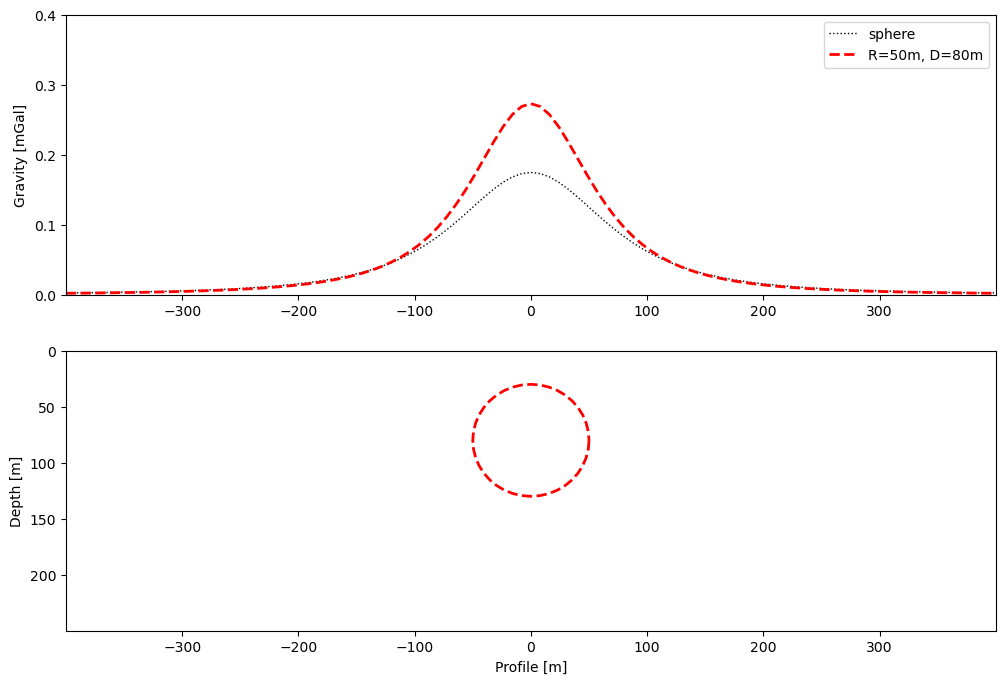

In [6]:
plot_sphere(f2=True)

In [7]:
# call interactive module
w = dict(
f1=widgets.Checkbox(value=True,description='eins',continuous_update=False,disabled=False),
#a1=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f2=widgets.Checkbox(value=False,description='zwei',continuous_update=False,disabled=False),
f3=widgets.Checkbox(value=False,description='drei',continuous_update=False,disabled=False),
f4=widgets.Checkbox(value=False,description='vier',continuous_update=False,disabled=False),
f5=widgets.Checkbox(value=False,description='fuenf',continuous_update=False,disabled=False))
output = widgets.interactive_output(plot_sphere, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

... done